In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d0=pd.read_excel('merged.xlsx')

In [3]:
d0.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_assignment_waiting,call_duration,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,7,31,Matthew Foster,4,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,3,12,Tammy Walters,-1,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,8,19,Jeffery Dixon,-1,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,5,7,David Wilkins,2,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,10,9,Elizabeth Daniels,0,Seating,neutral,polite,-0.05,0.35


In [4]:
d0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   call_id                   66653 non-null  int64         
 1   customer_id               66653 non-null  int64         
 2   agent_id                  66653 non-null  int64         
 3   call_start_datetime       66653 non-null  datetime64[ns]
 4   agent_assigned_datetime   66653 non-null  datetime64[ns]
 5   call_end_datetime         66653 non-null  datetime64[ns]
 6   call_transcript           66653 non-null  object        
 7   agent_assignment_waiting  66653 non-null  int64         
 8   call_duration             66653 non-null  int64         
 9   customer_name             66653 non-null  object        
 10  elite_level_code          66653 non-null  int64         
 11  primary_call_reason       66653 non-null  object        
 12  agent_tone        

# categorical data
- we notice that : 
    - elite_level_code
    - primary_call_reason
    - agent_tone
    - customer_tone
    are actually categorical in nature

- ordered : 
    - elite_level_code(-1 upto 5)
    - agent_tone & customer_tone(polite > calm > neutral > frustrated > angry)
- unordered : 
    - primary_call_reason

In [5]:
c=[i for i in d0.primary_call_reason.unique()]
c

['Voluntary Cancel',
 'Booking',
 'IRROPS',
 'Upgrade',
 'Seating',
 'Mileage Plus',
 'Checkout',
 'Voluntary Change',
 'Post Flight',
 'Check In',
 'Other Topics',
 'Communications',
 'Schedule Change',
 'Products and Services',
 'Digital Support',
 'Disability',
 'Unaccompanied Minor',
 'Baggage',
 'Traveler Updates',
 'ETC']

In [6]:
d1=d0.copy()

In [7]:
d1['elite_level_code']=pd.Categorical(values=d1.elite_level_code,categories=[i for i in range(-1,5+1,1)],ordered=True)

In [8]:
d1['primary_call_reason']=pd.Categorical(values=d1.primary_call_reason,categories=c,ordered=False)

In [9]:
d1['agent_tone']=pd.Categorical(values=d1.agent_tone,categories=['angry','frustrated','neutral','calm','polite'],ordered=False)

d1['customer_tone']=pd.Categorical(values=d1.customer_tone,categories=['angry','frustrated','neutral','calm','polite'],ordered=False)

In [10]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66653 entries, 0 to 66652
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   call_id                   66653 non-null  int64         
 1   customer_id               66653 non-null  int64         
 2   agent_id                  66653 non-null  int64         
 3   call_start_datetime       66653 non-null  datetime64[ns]
 4   agent_assigned_datetime   66653 non-null  datetime64[ns]
 5   call_end_datetime         66653 non-null  datetime64[ns]
 6   call_transcript           66653 non-null  object        
 7   agent_assignment_waiting  66653 non-null  int64         
 8   call_duration             66653 non-null  int64         
 9   customer_name             66653 non-null  object        
 10  elite_level_code          66653 non-null  category      
 11  primary_call_reason       66653 non-null  category      
 12  agent_tone        

In [11]:
d1.describe(include='all')

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_assignment_waiting,call_duration,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
count,6.665300e+04,6.665300e+04,66653.000000,66653,66653,66653,66653,66653.000000,66653.000000,66653,66653.0,66653,66653,66653,66653.000000,66653.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,66653,NaN,NaN,51248,7.0,20,5,5,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,\n\nAgent: Thank you for calling United Airlin...,NaN,NaN,Michael Smith,-1.0,IRROPS,neutral,neutral,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,35,23959.0,13311,39886,13402,NaN,NaN
mean,4.993883e+09,5.006607e+09,564623.782936,2024-08-16 11:00:46.465725440,2024-08-16 11:08:03.437804800,2024-08-16 11:19:40.614525952,NaN,7.282868,11.619612,NaN,NaN,NaN,NaN,NaN,-0.033577,0.285446
min,1.316420e+05,4.430700e+05,102574.000000,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:17:00,NaN,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,-1.380000,0.000000
25%,2.481353e+09,2.514373e+09,347606.000000,2024-08-09 11:25:00,2024-08-09 11:32:00,2024-08-09 11:45:00,NaN,5.000000,4.000000,NaN,NaN,NaN,NaN,NaN,-0.110000,0.130000
50%,4.987649e+09,5.006072e+09,591778.000000,2024-08-17 09:12:00,2024-08-17 09:19:00,2024-08-17 09:31:00,NaN,7.000000,7.000000,NaN,NaN,NaN,NaN,NaN,-0.020000,0.260000
75%,7.495496e+09,7.509114e+09,786323.000000,2024-08-24 14:22:00,2024-08-24 14:29:00,2024-08-24 14:40:00,NaN,9.000000,15.000000,NaN,NaN,NaN,NaN,NaN,0.050000,0.410000
max,9.999806e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,NaN,15.000000,119.000000,NaN,NaN,NaN,NaN,NaN,2.670000,0.980000


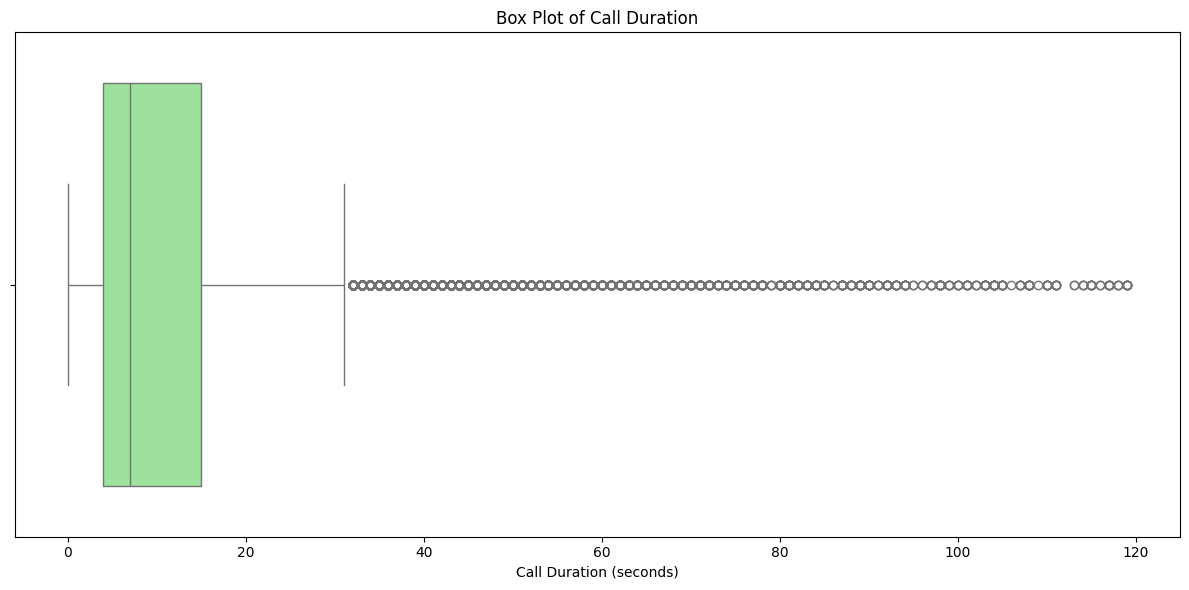

In [12]:
plt.figure(figsize=(12, 6))

# Create a box plot for call duration
sns.boxplot(x=d1['call_duration'], color='lightgreen')

# Set title and labels
plt.title("Box Plot of Call Duration")
plt.xlabel("Call Duration (seconds)")

# Display the plot
plt.tight_layout()
plt.show()

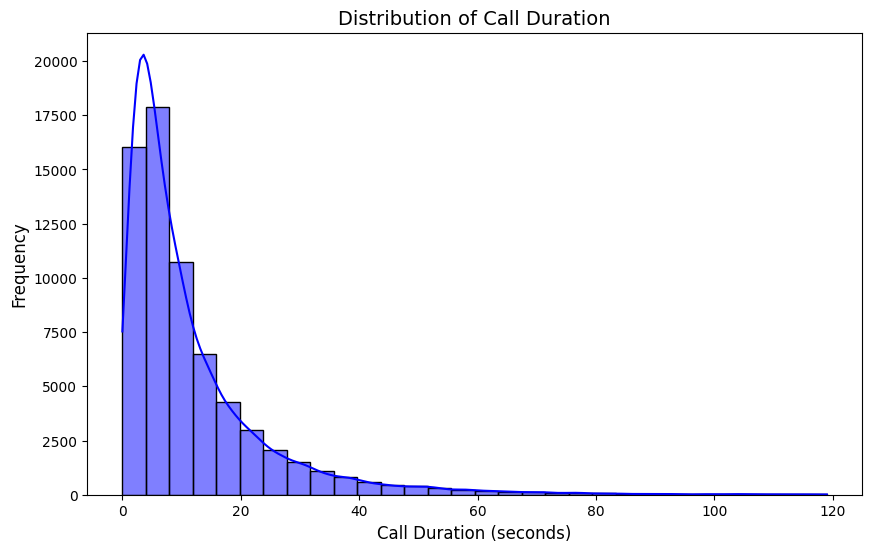

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histplot for call_duration
sns.histplot(d1['call_duration'], bins=30, kde=True, color='blue')

# Add labels and title
plt.xlabel('Call Duration (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Call Duration', fontsize=14)

# Display the plot
plt.show()

In [14]:
d1.call_duration.describe()

count    66653.000000
mean        11.619612
std         12.905448
min          0.000000
25%          4.000000
50%          7.000000
75%         15.000000
max        119.000000
Name: call_duration, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Voluntary Cancel'),
  Text(1, 0, 'Booking'),
  Text(2, 0, 'IRROPS'),
  Text(3, 0, 'Upgrade'),
  Text(4, 0, 'Seating'),
  Text(5, 0, 'Mileage Plus'),
  Text(6, 0, 'Checkout'),
  Text(7, 0, 'Voluntary Change'),
  Text(8, 0, 'Post Flight'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Other Topics'),
  Text(11, 0, 'Communications'),
  Text(12, 0, 'Schedule Change'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'Digital Support'),
  Text(15, 0, 'Disability'),
  Text(16, 0, 'Unaccompanied Minor'),
  Text(17, 0, 'Baggage'),
  Text(18, 0, 'Traveler Updates'),
  Text(19, 0, 'ETC')])

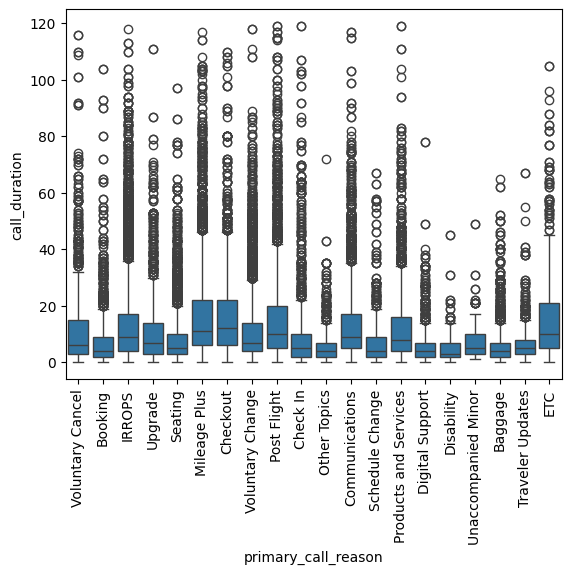

In [16]:
sns.boxplot(
    data=d1,
    x='primary_call_reason',
    y='call_duration'
)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Voluntary Cancel'),
  Text(1, 0, 'Booking'),
  Text(2, 0, 'IRROPS'),
  Text(3, 0, 'Upgrade'),
  Text(4, 0, 'Seating'),
  Text(5, 0, 'Mileage Plus'),
  Text(6, 0, 'Checkout'),
  Text(7, 0, 'Voluntary Change'),
  Text(8, 0, 'Post Flight'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Other Topics'),
  Text(11, 0, 'Communications'),
  Text(12, 0, 'Schedule Change'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'Digital Support'),
  Text(15, 0, 'Disability'),
  Text(16, 0, 'Unaccompanied Minor'),
  Text(17, 0, 'Baggage'),
  Text(18, 0, 'Traveler Updates'),
  Text(19, 0, 'ETC')])

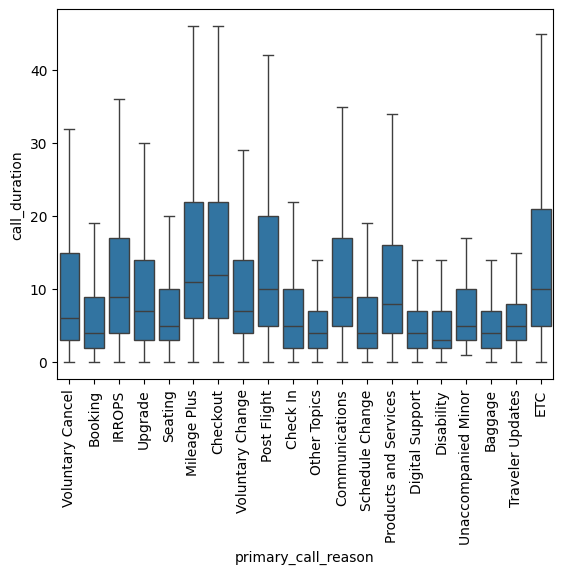

In [110]:
sns.boxplot(
    data=d1,
    x='primary_call_reason',
    y='call_duration',
    showfliers=False
)
plt.xticks(rotation=90)

1. Variation in Call Duration:
   - There's significant variation in call duration across different call reasons.

2. Longest Average Calls:
   - "Mileage Plus", "Voluntary Change", and "Products and Services" have the highest median call durations.
   - These likely represent more complex issues requiring longer resolution times.

3. Shortest Average Calls:
   - "Digital Support", "Baggage", and "Check In" have the lowest median call durations.
   - These may represent more straightforward issues that can be resolved quickly.

4. Wide Range for Some Categories:
   - Categories like "ETC", "IRROPS", and "Voluntary Change" show wide interquartile ranges.
   - This suggests high variability in call duration for these issues, possibly due to varying complexity.

5. Outliers:
   - Most categories have numerous outliers (dots above the whiskers), indicating some exceptionally long calls.
   - "Voluntary Cancel" and "Booking" have particularly high outliers.

6. Consistency in Short Calls:
   - Many categories have similar lower quartiles, suggesting a consistent minimum time for handling basic inquiries.

7. Skewed Distributions:
   - Most categories show right-skewed distributions, with longer tails towards higher durations.

8. Potential for Process Improvement:
   - Categories with high variability (wide boxes and many outliers) might benefit from standardized processes or additional agent training.

9. Resource Allocation Insights:
   - Longer call categories might require more experienced agents or dedicated teams.

10. Customer Experience Implications:
    - Categories with consistently longer calls (e.g., "Mileage Plus", "Voluntary Change") might benefit from alternative support channels or improved self-service options.

11. Efficiency Opportunities:
    - Short-duration categories like "Digital Support" could be candidates for automation or chatbot handling.

12. Outlier Investigation:
    - Extremely long calls (high outliers) in categories like "Voluntary Cancel" and "Booking" might warrant investigation for process improvements or identifying complex edge cases.

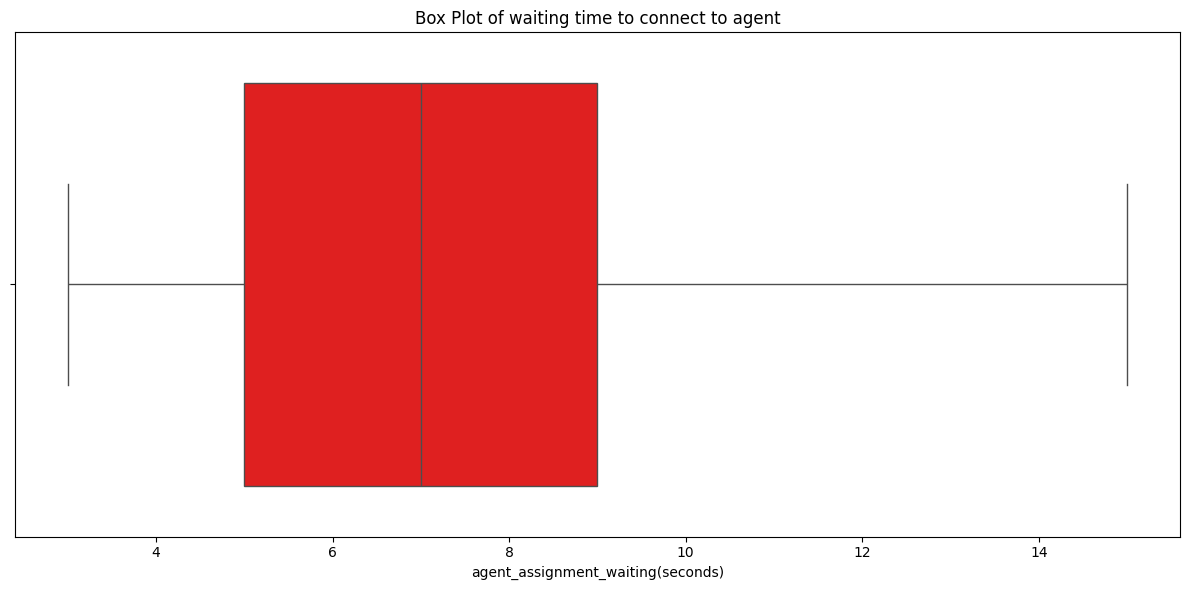

In [149]:
plt.figure(figsize=(12, 6))

# Create a box plot for call duration
sns.boxplot(x=d1['agent_assignment_waiting'], color='red')

# Set title and labels
plt.title("Box Plot of waiting time to connect to agent")
plt.xlabel("agent_assignment_waiting(seconds)")

# Display the plot
plt.tight_layout()
plt.show()

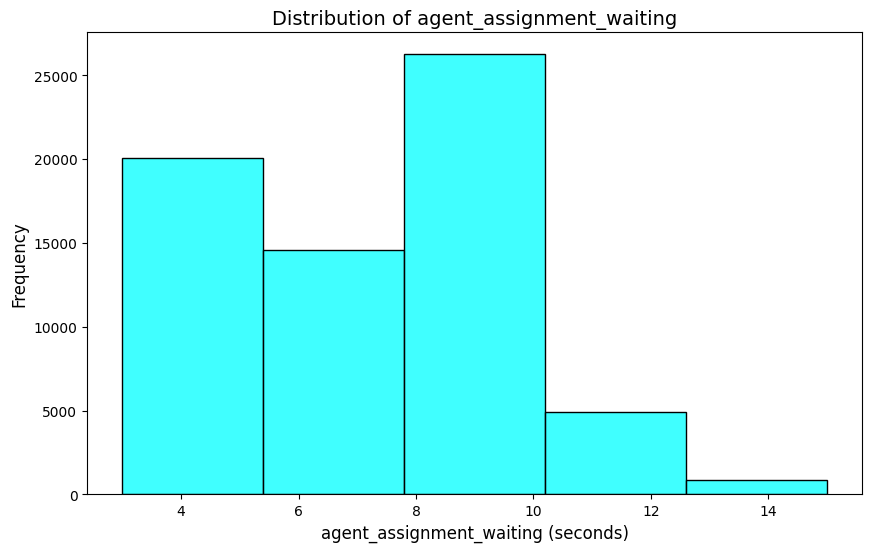

In [152]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histplot for call_duration
sns.histplot(d1['agent_assignment_waiting'], bins=5, color='cyan')

# Add labels and title
plt.xlabel('agent_assignment_waiting (seconds)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of agent_assignment_waiting', fontsize=14)

# Display the plot
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Voluntary Cancel'),
  Text(1, 0, 'Booking'),
  Text(2, 0, 'IRROPS'),
  Text(3, 0, 'Upgrade'),
  Text(4, 0, 'Seating'),
  Text(5, 0, 'Mileage Plus'),
  Text(6, 0, 'Checkout'),
  Text(7, 0, 'Voluntary Change'),
  Text(8, 0, 'Post Flight'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Other Topics'),
  Text(11, 0, 'Communications'),
  Text(12, 0, 'Schedule Change'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'Digital Support'),
  Text(15, 0, 'Disability'),
  Text(16, 0, 'Unaccompanied Minor'),
  Text(17, 0, 'Baggage'),
  Text(18, 0, 'Traveler Updates'),
  Text(19, 0, 'ETC')])

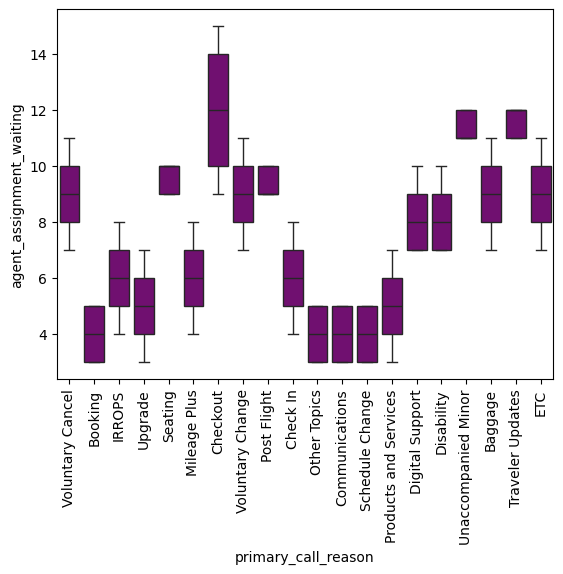

In [154]:
sns.boxplot(
    data=d1,
    x='primary_call_reason',
    y='agent_assignment_waiting',
    showfliers=False,
    color='purple'
)
plt.xticks(rotation=90)

In [111]:
d1['hour'] = d1['call_start_datetime'].dt.hour

# Group by the hour and count the number of calls in each hour
hourly_call_count = d1.groupby('hour').size().reset_index(name='number_of_calls')

# Display the result
print(hourly_call_count)

    hour  number_of_calls
0      0             1064
1      1             1044
2      2              965
3      3              998
4      4              985
5      5             1029
6      6             1008
7      7             1477
8      8             4817
9      9             4929
10    10             4812
11    11             4873
12    12             4916
13    13             4780
14    14             4844
15    15             4826
16    16             4875
17    17             4883
18    18             4334
19    19             1030
20    20             1052
21    21             1029
22    22             1044
23    23             1039


C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2451106776.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hour', y='number_of_calls', data=hourly_call_count, palette='Blues_d')


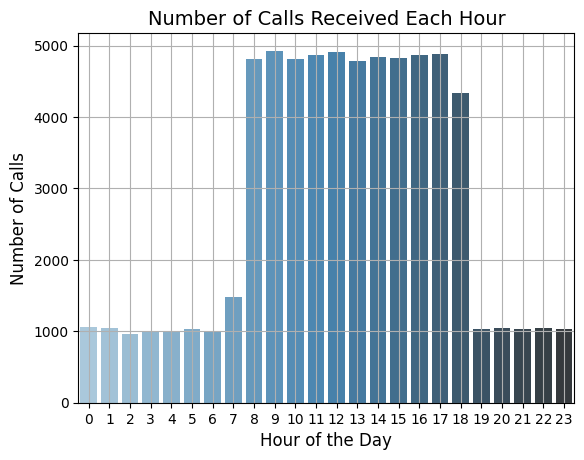

In [112]:
# Create a barplot for the number of calls per hour using seaborn
sns.barplot(x='hour', y='number_of_calls', data=hourly_call_count, palette='Blues_d')

# Add labels and title
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Calls', fontsize=12)
plt.title('Number of Calls Received Each Hour', fontsize=14)

# Show the plot
plt.xticks(range(0, 24))  # Ensures all 24 hours are labeled
plt.grid(True)
plt.show()

1. Peak hours: The busiest period appears to be between 9 AM and 7 PM (hours 9-19), with call volumes consistently above 4,000 per hour.

2. Highest volume: The peak call volume occurs around 10-11 AM (hour 10-11), with nearly 5,000 calls received.

3. Low periods: Call volumes are significantly lower from midnight to 7 AM (hours 0-7), with fewer than 1,500 calls per hour.

4. Gradual increase: There's a sharp increase in call volume starting at 8 AM, likely corresponding to the beginning of the business day.

5. Evening decline: Call volumes start to decrease after 7 PM (hour 19), with a more rapid drop-off after 9 PM (hour 21).

6. Overnight consistency: The overnight period (11 PM to 5 AM) shows a steady, low volume of calls, likely representing a baseline of emergency or essential calls.

7. Working hours pattern: The graph clearly shows a typical workday pattern, with high volumes during standard business hours and lower volumes outside of them.

8. Potential staffing implications: This data could be useful for planning staffing levels, with more staff needed during peak hours and fewer during overnight periods.

# AHT by primary_call_reason

In [74]:
AHT_by_reason=d1.groupby('primary_call_reason').agg(
    AHT=pd.NamedAgg(column='call_duration',aggfunc='mean')
).sort_values('AHT').reset_index()

AHT_by_reason

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2412560352.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AHT_by_reason=d1.groupby('primary_call_reason').agg(


,primary_call_reason,AHT
0,Disability,4.868486
1,Baggage,5.560734
2,Other Topics,5.834963
3,Digital Support,6.204898
4,Traveler Updates,6.553895
5,Booking,7.128934
6,Seating,7.916575
7,Schedule Change,8.166895
8,Unaccompanied Minor,8.653846
9,Check In,9.568803


In [75]:
AHT_by_reason.describe()

,AHT
count,20.000000
mean,10.406221
std,3.960416
min,4.868486
25%,6.985175
50%,10.053941
75%,13.258612
max,16.947564


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Disability'),
  Text(1, 0, 'Baggage'),
  Text(2, 0, 'Other Topics'),
  Text(3, 0, 'Digital Support'),
  Text(4, 0, 'Traveler Updates'),
  Text(5, 0, 'Booking'),
  Text(6, 0, 'Seating'),
  Text(7, 0, 'Schedule Change'),
  Text(8, 0, 'Unaccompanied Minor'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Upgrade'),
  Text(11, 0, 'Voluntary Change'),
  Text(12, 0, 'Voluntary Cancel'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'IRROPS'),
  Text(15, 0, 'Communications'),
  Text(16, 0, 'Post Flight'),
  Text(17, 0, 'ETC'),
  Text(18, 0, 'Mileage Plus'),
  Text(19, 0, 'Checkout')])

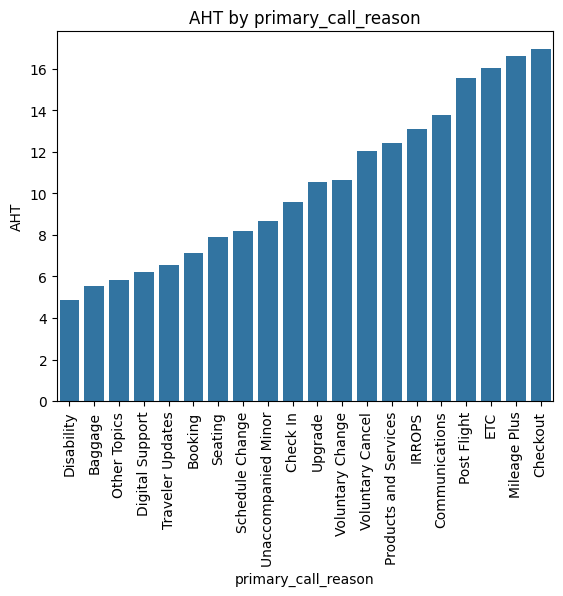

In [76]:
sns.barplot(
    data=AHT_by_reason,
    x='primary_call_reason',
    y='AHT',
    order=AHT_by_reason.primary_call_reason
)

plt.title('AHT by primary_call_reason')
plt.xticks(rotation=90)

- `distribution in reason`
    - average call duration or AHT is longest(17 minutes approx) for Checkout followed by closely by Mileage(16 minutes), ETC(16 minutes) & Post Flight(15 minutes)
    - AHT is least for Disability(around 5 minutes) followed Baggage(5 minutes) & Other Topics(6 minutes)
    - many reasons fall in mid range AHT(10-13 minutes) like Upgrade, Voluntary Change, Voluntary Cancel, Products and Services, IRROPS & Communication

- `nature of reason` : 
    - transaction-related calls(Check-in, Check-out) tend to have longer AHT
    - Mileage Plus related calls are high
    - issues  requiring more complex problem-solving(Post Flight, Communications & IRROPS) also have significant longer duration
    - simple inquiries or status checks (Baggage, Disability) have shorter durations

- `customer service implications & potential areas of improvements` :
    - longer call durations for check-out and complex issues suggest these areas may require more staff training or improved processes
    - short durations for disability-related calls might indicate efficient handling, but consider if the short duration of disability-related calls is appropriate or if more comprehensive assistance is needed
    - the wide variance in call durations (std of around 4 minutes) across categories suggests that different types of issues require significantly different handling times & this information could be valuable for staffing and training purposes
    - customers calling about Checkout, Mileage, ETC & Post Flight should perhaps be informed that their call might take longer, this data could help in setting correct customer expectations for wait times
    - some related categories show similar handling times (Upgrade, Voluntary Cancel & Voluntary Change), this might indicate consistent handling processes for similar issues & staffing can be done for both with similar processes


    - <span style="color:red">investigate why check-out calls take significantly longer than check-in calls</span>


# AST by primary_call_reason

In [139]:
AST_by_reason=d1.groupby('primary_call_reason').agg(
    AST=pd.NamedAgg(column='agent_assignment_waiting',aggfunc='mean')
).sort_values('AST').reset_index()

AST_by_reason

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2143606614.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AST_by_reason=d1.groupby('primary_call_reason').agg(


,primary_call_reason,AST
0,Other Topics,3.979218
1,Communications,3.999479
2,Booking,4.003792
3,Schedule Change,4.013680
4,Upgrade,4.974799
5,Products and Services,5.040816
6,Check In,5.930672
7,IRROPS,6.001352
8,Mileage Plus,6.016920
9,Disability,8.392060


In [140]:
AST_by_reason.describe()

,AST
count,20.000000
mean,7.547106
std,2.714994
min,3.979218
25%,5.024312
50%,8.410315
75%,9.176204
max,12.078390


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Other Topics'),
  Text(1, 0, 'Communications'),
  Text(2, 0, 'Booking'),
  Text(3, 0, 'Schedule Change'),
  Text(4, 0, 'Upgrade'),
  Text(5, 0, 'Products and Services'),
  Text(6, 0, 'Check In'),
  Text(7, 0, 'IRROPS'),
  Text(8, 0, 'Mileage Plus'),
  Text(9, 0, 'Disability'),
  Text(10, 0, 'Digital Support'),
  Text(11, 0, 'Voluntary Cancel'),
  Text(12, 0, 'Voluntary Change'),
  Text(13, 0, 'Baggage'),
  Text(14, 0, 'ETC'),
  Text(15, 0, 'Post Flight'),
  Text(16, 0, 'Seating'),
  Text(17, 0, 'Unaccompanied Minor'),
  Text(18, 0, 'Traveler Updates'),
  Text(19, 0, 'Checkout')])

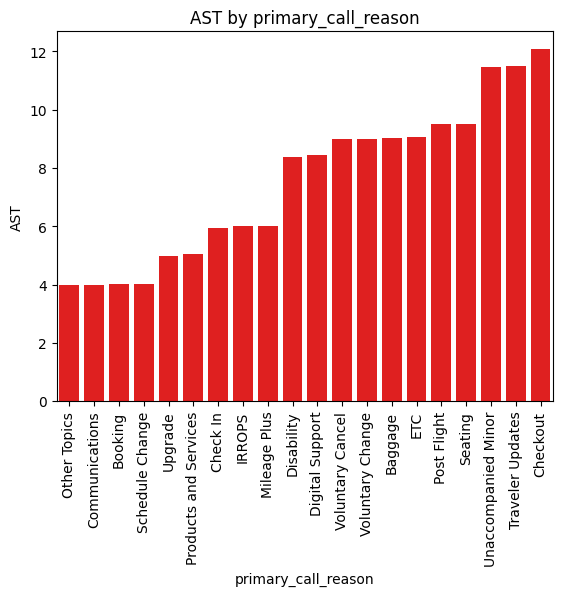

In [155]:
sns.barplot(
    data=AST_by_reason,
    x='primary_call_reason',
    y='AST',
    order=AST_by_reason.primary_call_reason,
    color='red'
)

plt.title('AST by primary_call_reason')
plt.xticks(rotation=90)

# distribution of calls by reason

In [68]:
frequent_calls_by_reason=d1.groupby('primary_call_reason').agg(
    count_calls=pd.NamedAgg(column='call_id',aggfunc='count')
).reset_index().sort_values('count_calls')

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\3330103801.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequent_calls_by_reason=d1.groupby('primary_call_reason').agg(


In [69]:
frequent_calls_by_reason

,primary_call_reason,count_calls
16,Unaccompanied Minor,104
15,Disability,403
12,Schedule Change,731
10,Other Topics,818
18,Traveler Updates,937
19,ETC,952
14,Digital Support,1225
0,Voluntary Cancel,1607
6,Checkout,1888
9,Check In,1904


In [70]:
frequent_calls_by_reason.describe()

,count_calls
count,20.000000
mean,3332.650000
std,3471.533171
min,104.000000
25%,948.250000
50%,2270.500000
75%,3962.500000
max,13311.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Unaccompanied Minor'),
  Text(1, 0, 'Disability'),
  Text(2, 0, 'Schedule Change'),
  Text(3, 0, 'Other Topics'),
  Text(4, 0, 'Traveler Updates'),
  Text(5, 0, 'ETC'),
  Text(6, 0, 'Digital Support'),
  Text(7, 0, 'Voluntary Cancel'),
  Text(8, 0, 'Checkout'),
  Text(9, 0, 'Check In'),
  Text(10, 0, 'Booking'),
  Text(11, 0, 'Upgrade'),
  Text(12, 0, 'Baggage'),
  Text(13, 0, 'Products and Services'),
  Text(14, 0, 'Communications'),
  Text(15, 0, 'Post Flight'),
  Text(16, 0, 'Mileage Plus'),
  Text(17, 0, 'Seating'),
  Text(18, 0, 'Voluntary Change'),
  Text(19, 0, 'IRROPS')])

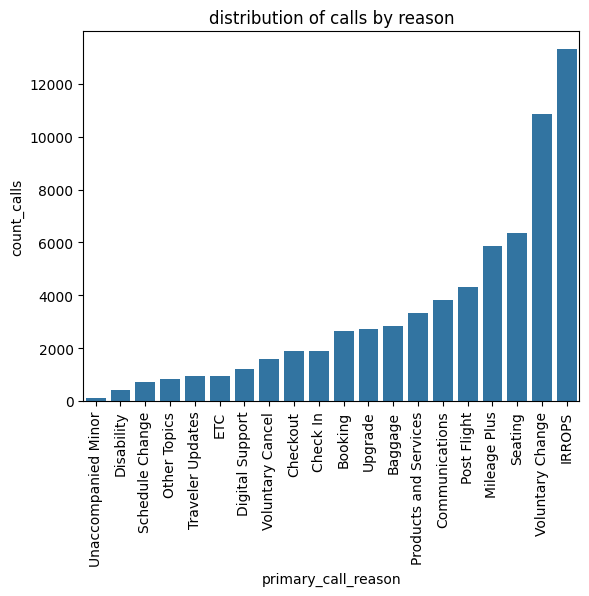

In [95]:
sns.barplot(
    data=frequent_calls_by_reason,
    x='primary_call_reason',
    y='count_calls',
    order=frequent_calls_by_reason.primary_call_reason
)

plt.title('distribution of calls by reason')
plt.xticks(rotation=90)

- `High-Volume Categories` :
   - IRROPS, Voluntary Chang shows the highest number of interactions overall, these likely represent common customer service scenarios

# quantifying
- percentage difference btw AHT for most frequent call & least frequent call reason

In [72]:
mask1=frequent_calls_by_reason.count_calls==frequent_calls_by_reason.count_calls.max()

mask2=frequent_calls_by_reason.count_calls==frequent_calls_by_reason.count_calls.min()

most_frequent_reason=frequent_calls_by_reason[mask1].iloc[0,0]

most_frequent_reason

'IRROPS'

In [73]:
least_frequent_reason=frequent_calls_by_reason[mask2].iloc[0,0]

least_frequent_reason

'Unaccompanied Minor'

In [79]:
a=AHT_by_reason.AHT[AHT_by_reason.primary_call_reason==most_frequent_reason]
a

14    13.085268
Name: AHT, dtype: float64

In [90]:
a=AHT_by_reason[AHT_by_reason.primary_call_reason==most_frequent_reason].AHT.iloc[0]

b=AHT_by_reason[AHT_by_reason.primary_call_reason==least_frequent_reason].AHT.iloc[0]

b

np.float64(8.653846153846153)

In [91]:
perc_dif_AHT_most_least_freq_reason=((a-b)/b)*100

perc_dif_AHT_most_least_freq_reason

np.float64(51.20753929498577)

- we observe that average call duration of most frequent call reason is 51% more than the avg duration of least frequent call reason

# distribution of agent tone by call reason

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2336337888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tone_distribution = d1.groupby(['primary_call_reason', 'agent_tone'])['agent_id'].count().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

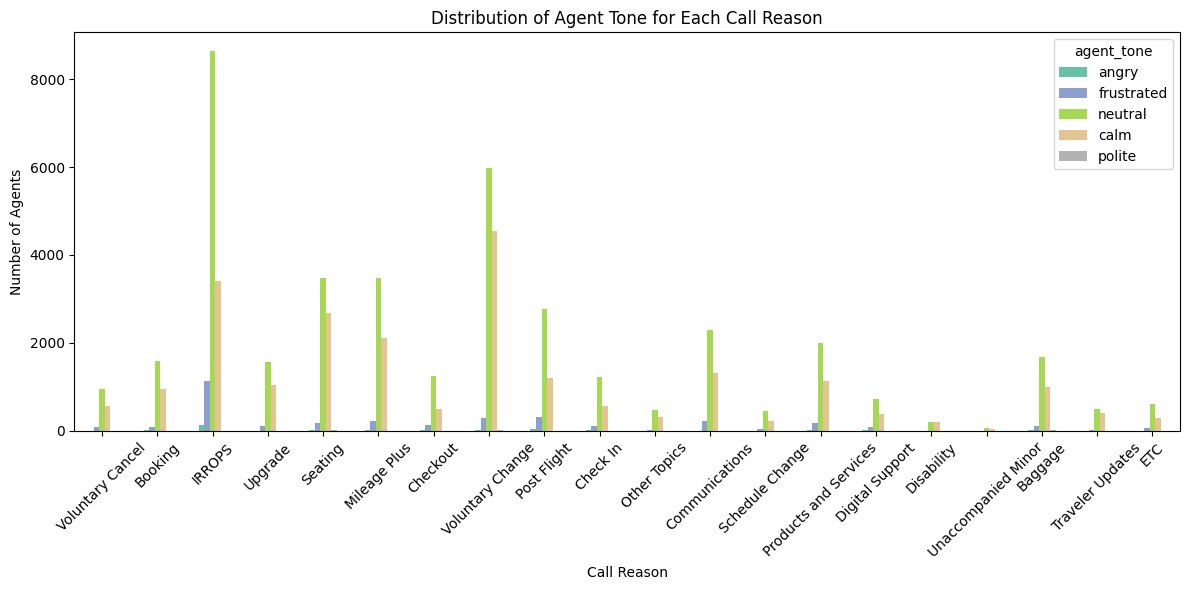

In [67]:
tone_distribution = d1.groupby(['primary_call_reason', 'agent_tone'])['agent_id'].count().unstack().fillna(0)

# Set figure size
plt.figure(figsize=(12, 6))

# Plotting the grouped bar plot
tone_distribution.plot(kind='bar', figsize=(12, 6), colormap='Set2')

# Set title and labels
plt.title("Distribution of Agent Tone for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Number of Agents")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

- `Overall Tone Patterns`:
   - Neutral and calm tones dominate across all call categories
   - Very low instances of angry tone, which is positive for customer service
   - Frustrated tone appears occasionally, notably in IRROPS (Irregular Operations)

- `Professional Demeanor` :
   - The prevalence of neutral and calm tones suggests well-trained agents(Minimal angry tones), polite tone is consistently present but not dominant

- `Challenging Situations` :
   - IRROPS has the most diverse tone distribution, including frustrated tones
   - This suggests it's potentially the most challenging type of call to handle

- `Customer Service Implications` :
   - Consistent calm tone across categories indicates good emotional management
   - Minimal angry tones suggest effective de-escalation techniques

- `staffing insights` :
   - Categories with more varied tones might need additional agent support(IRROPS)
   - Best practices could be shared from categories with consistently calm/neutral tones

# distribution of customer tone by call reason

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\1219390291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_tone_distribution = d1.groupby(['primary_call_reason', 'customer_tone'])['call_id'].count().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

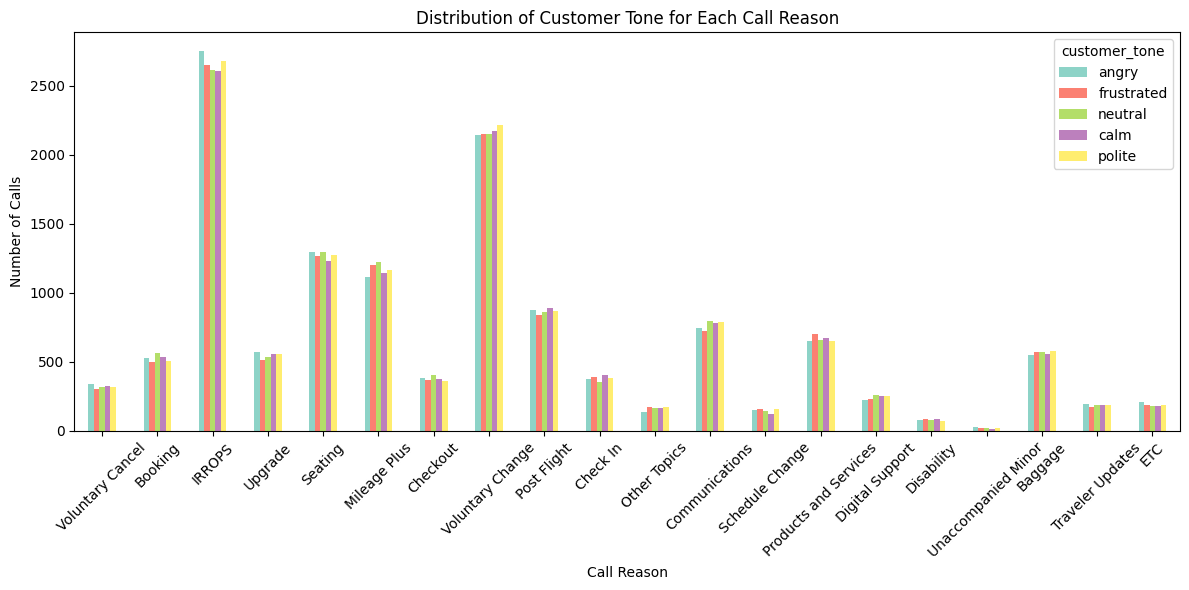

In [97]:
customer_tone_distribution = d1.groupby(['primary_call_reason', 'customer_tone'])['call_id'].count().unstack().fillna(0)

# Set the figure size
plt.figure(figsize=(12, 6))

# Plotting the grouped bar plot for customer tone distribution
customer_tone_distribution.plot(kind='bar', figsize=(12, 6), colormap='Set3')

# Set title and labels
plt.title("Distribution of Customer Tone for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

- `Overall Pattern Observation` :
   - consistent distribution of tones across all categories
   - All five tones (angry, calm, frustrated, neutral, polite) appear in almost equal proportions for each call reason
- `Customer Emotional State` :
   - Despite potential stress, customers maintain a balanced emotional response

- `Most Challenging Interactions`:
   - IROPS, while having the most calls, maintains the same tone distribution
   - This suggests that even in irregular situations, customer reactions are varied but balanced

- `Low-Volume Categories`:
   - Disability and Unaccompanied Minor have the fewest calls

- `Customer Service Implications`:
   - The consistent distribution across categories suggests agents need to be prepared for any emotional state regardless of the call reason

- `Training Insights`:
   - Agents should be trained to handle all emotional states equally

- `Operational Considerations`:
   - Resource allocation should focus on high-volume categories (IRROPS, Voluntary Change)
   - The consistent emotional distribution suggests a need for standardized handling procedures

- `Customer Experience Analysis`:
    - The equal distribution of polite and angry tones suggests that customer satisfaction might be more related to individual expectations than specific issues
    - data suggests that predicting customer mood based on call reason is not reliable


# agent tone vs customer tone

- Unlike agent tones which showed more variation, customer tones are consistently distributed, this highlights the professionalism of agents in managing various customer emotional states
- make gradient graph here

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2382365469.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agent_tone_count = d1.groupby(['hour', 'agent_tone']).size().reset_index(name='agent_tone_count')
C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2382365469.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_tone_count = d1.groupby(['hour', 'customer_tone']).size().reset_index(name='customer_tone_count')


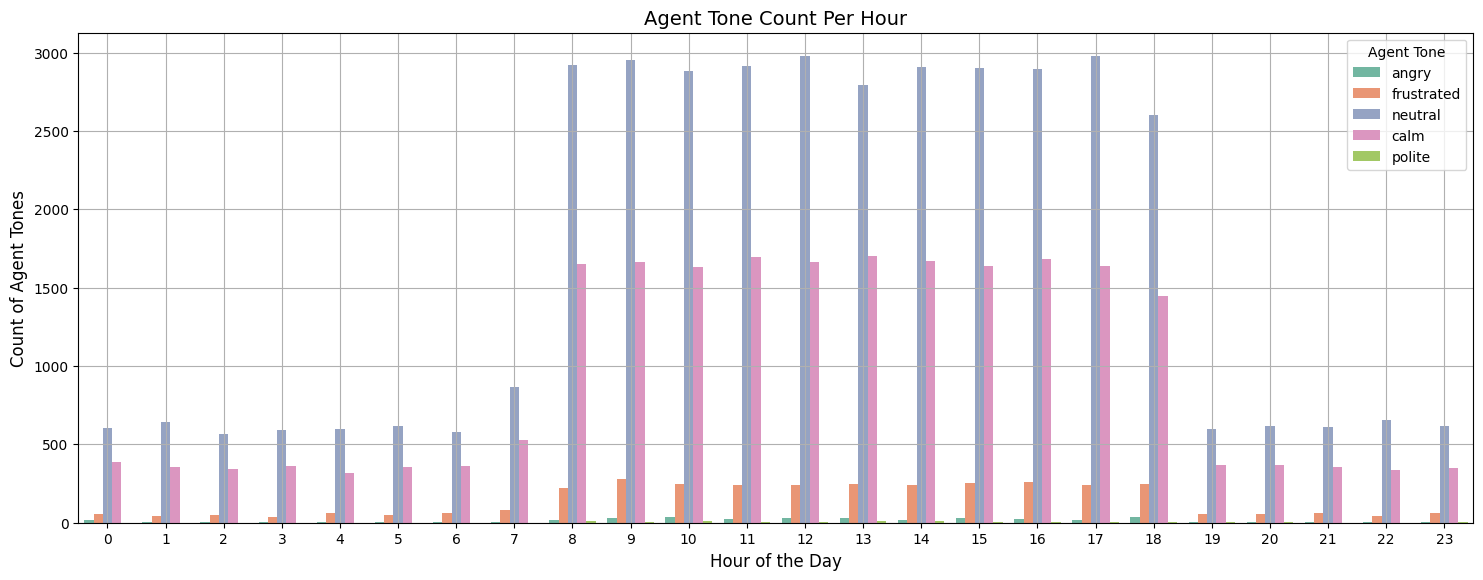

In [115]:
d1['hour'] = d1['call_start_datetime'].dt.hour

# Group by hour, agent_tone, and customer_tone and count the occurrences
agent_tone_count = d1.groupby(['hour', 'agent_tone']).size().reset_index(name='agent_tone_count')
customer_tone_count = d1.groupby(['hour', 'customer_tone']).size().reset_index(name='customer_tone_count')

# Set the figure size for the plots
plt.figure(figsize=(18, 14))

# Create a subplot for Agent Tone
plt.subplot(2, 1, 1)
sns.barplot(x='hour', y='agent_tone_count', hue='agent_tone', data=agent_tone_count, palette='Set2')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count of Agent Tones', fontsize=12)
plt.title('Agent Tone Count Per Hour', fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title='Agent Tone')
plt.grid(True)

- Call Volume Pattern:
    - Peak call volumes occur during midday hours (8 AM to 6 PM).
    - Call volumes are significantly lower during night and early morning hours.
- Agent Tone Distribution:
    - "Polite" and "calm" tones are the most prevalent.
    - "Angry" and "frustrated" tones appear very infrequently.
- Tone Variation by Time of Day:
    - Use of "polite" tone increases during busy hours.
    - "Calm" tone becomes more prominent during nighttime hours.
- Peak Hours:
    - The hours from 8 AM to 6 PM appear to be the busiest, aligning with typical work hours.
- Agent Behavior:
    - Agents strive to maintain polite and calm tones most of the time.
    - Very little use of angry or frustrated tones, indicating good customer service.
- Night Shift:
    - Night shift has lower call volumes, but agents still maintain primarily calm and polite tones.
- Training Opportunities:
    - "Neutral" tone is used relatively little, which may present an opportunity for training towards more positive or helpful tones.

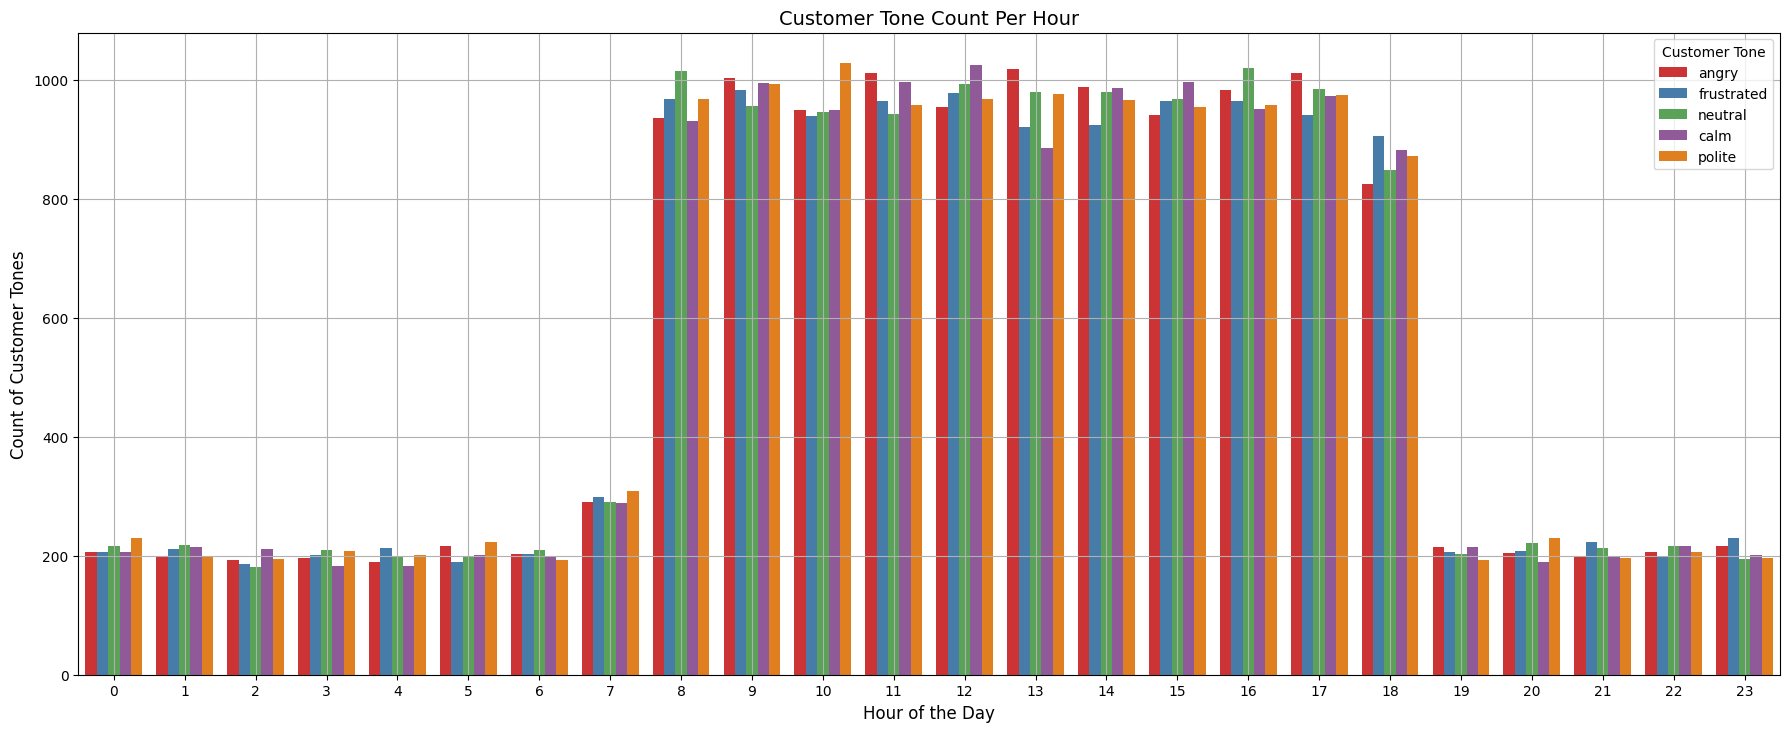

In [116]:
plt.figure(figsize=(18, 14))
plt.subplot(2, 1, 2)
sns.barplot(x='hour', y='customer_tone_count', hue='customer_tone', data=customer_tone_count, palette='Set1')
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Count of Customer Tones', fontsize=12)
plt.title('Customer Tone Count Per Hour', fontsize=14)
plt.xticks(range(0, 24))
plt.legend(title='Customer Tone')
plt.grid(True)

# Adjust layout to avoid overlapping of plots
plt.tight_layout()

# Show the plots
plt.show()

- Call Volume Pattern:
    - Peak call volumes occur between 8 AM and 6 PM, aligning with typical business hours.
    - Call volumes are significantly lower during night and early morning hours.
- Customer Tone Distribution:
    - All tone types (angry, calm, frustrated, neutral, polite) appear in fairly similar quantities.
    - No single tone dominates, indicating a diverse range of customer emotions.
- Tone Variation by Time of Day:
    - All tone types increase during busy hours.
    - Tone distribution is more even during nighttime hours.
- Negative Emotions:
    - "Angry" and "frustrated" tones are present in significant amounts, especially during peak hours.
    - This points to areas of customer dissatisfaction.
- Positive Behavior:
    - "Polite" and "calm" tones are also prominently featured, showing positive responses from some customers.
- Neutral Tone:
    - There's a substantial use of "neutral" tone, which may indicate uncertainty or indifference from some customers.
- Time of Day Impact:
    - There's a slight increase in negative tones (angry, frustrated) during afternoon and evening hours.

# distribution of call by elite level code(mp_status) & call reason

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\4013612029.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  elite_code_distribution = d1.groupby(['primary_call_reason', 'elite_level_code'])['call_id'].count().unstack().fillna(0)


<Figure size 1400x700 with 0 Axes>

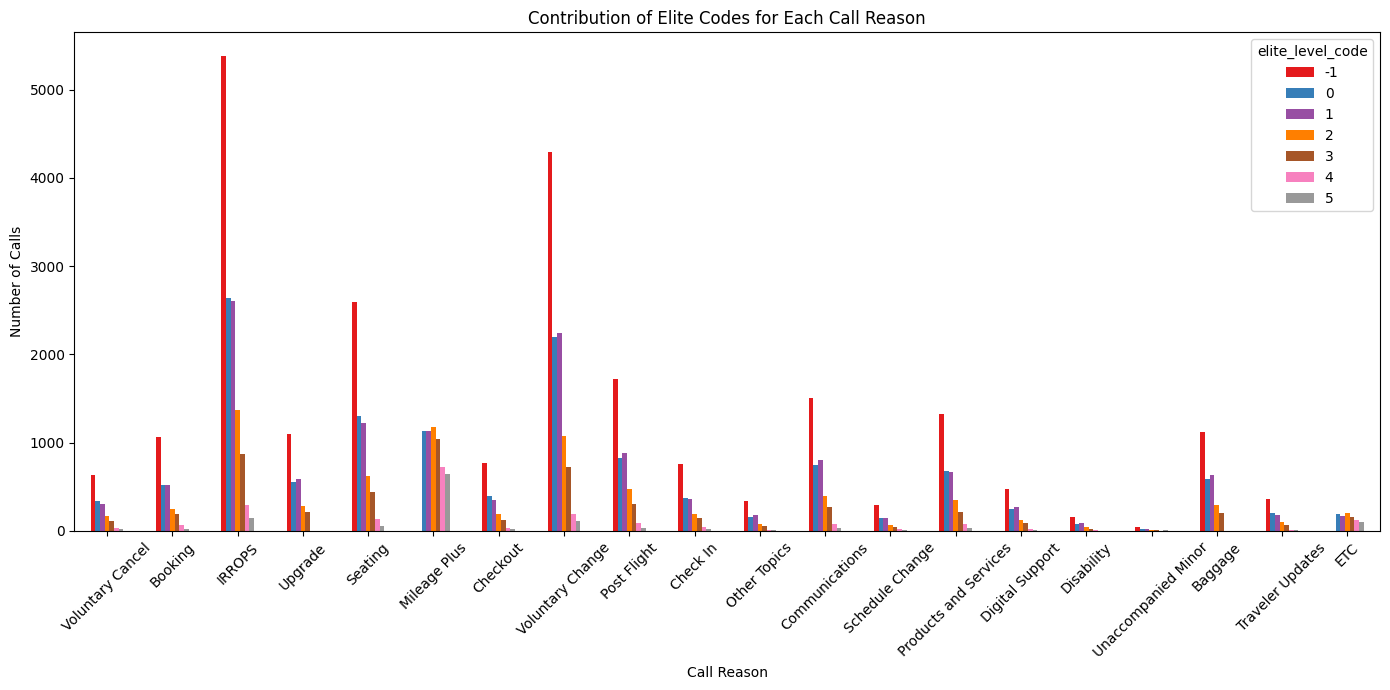

In [98]:
elite_code_distribution = d1.groupby(['primary_call_reason', 'elite_level_code'])['call_id'].count().unstack().fillna(0)

# Set the figure size
plt.figure(figsize=(14, 7))

# Plotting the grouped bar plot for elite code distribution
elite_code_distribution.plot(kind='bar', figsize=(14, 7), colormap='Set1')

# Set title and labels
plt.title("Contribution of Elite Codes for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Number of Calls")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

1. Elite Level Code Interpretation:
   - -1 represents non-elite customers (red bars, highest across categories)
   - 0-5 represent increasing levels of elite status
   - Higher numbers (3, 4, 5) appear less frequently, suggesting top-tier elites are rare

2. Call Volume Analysis:
   - IRROPS has the highest call volume across all elite levels followed by Voluntary Change, suggesting these issues affect all customer tiers equally

3. Elite Customer Behavior:
   - Higher elite levels (2-5) make fewer calls overall
   - This could indicate:
     * Better pre-emptive service for elite customers
     * More travel experience leading to fewer issues
     * Access to other support channels

4. Non-Elite Customer Patterns:
   - Non-elite customers (-1) make the most calls across all categories
   - Particularly high for IRROPS, suggesting they might need more support during travel disruptions

5. Category-Specific Insights:
   - Baggage issues occur across all elite levels
   - Premium services (Seating, Upgrades) show more activity from higher elite levels
   - Basic services (Check-in, Booking) have higher non-elite volumes

6. Operational Implications:
   - Need for differentiated support strategies based on elite status
   - Focus on improving self-service for non-elite customers to reduce call volume
   - Special handling procedures for elite customers seem effective

7. Customer Experience Considerations:
   - Higher elite levels might have better overall experiences (fewer calls)
   - Non-elite customers might benefit from more proactive support

8. Loyalty Program Insights:
   - Clear differentiation in service needs across elite levels
   - Could inform decisions about elite benefits and support resources

9. Areas for Improvement:
   - Reduce IROPS impact on non-elite customers
   - Consider extending some elite benefits to reduce common issues for non-elites

10. Resource Allocation:
    - Staff training should focus on handling non-elite customer issues
    - Specialized support for elite-specific concerns (upgrades, premium services)


In [119]:
avg_call_duration_table = d1.groupby(['primary_call_reason', 'elite_level_code'])['call_duration'].mean().reset_index()

# Rename the 'call_duration' column to 'average_call_duration' for clarity
avg_call_duration_table.rename(columns={'call_duration': 'average_call_duration'}, inplace=True)

# Display the resulting table
print(avg_call_duration_table)

    primary_call_reason elite_level_code  average_call_duration
0      Voluntary Cancel               -1              11.866142
1      Voluntary Cancel                0              11.726190
2      Voluntary Cancel                1              12.861842
3      Voluntary Cancel                2              11.736842
4      Voluntary Cancel                3              12.971963
..                  ...              ...                    ...
135                 ETC                1              16.257485
136                 ETC                2              15.530303
137                 ETC                3              16.631250
138                 ETC                4              15.535433
139                 ETC                5              13.761905

[140 rows x 3 columns]


C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\843572063.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_call_duration_table = d1.groupby(['primary_call_reason', 'elite_level_code'])['call_duration'].mean().reset_index()


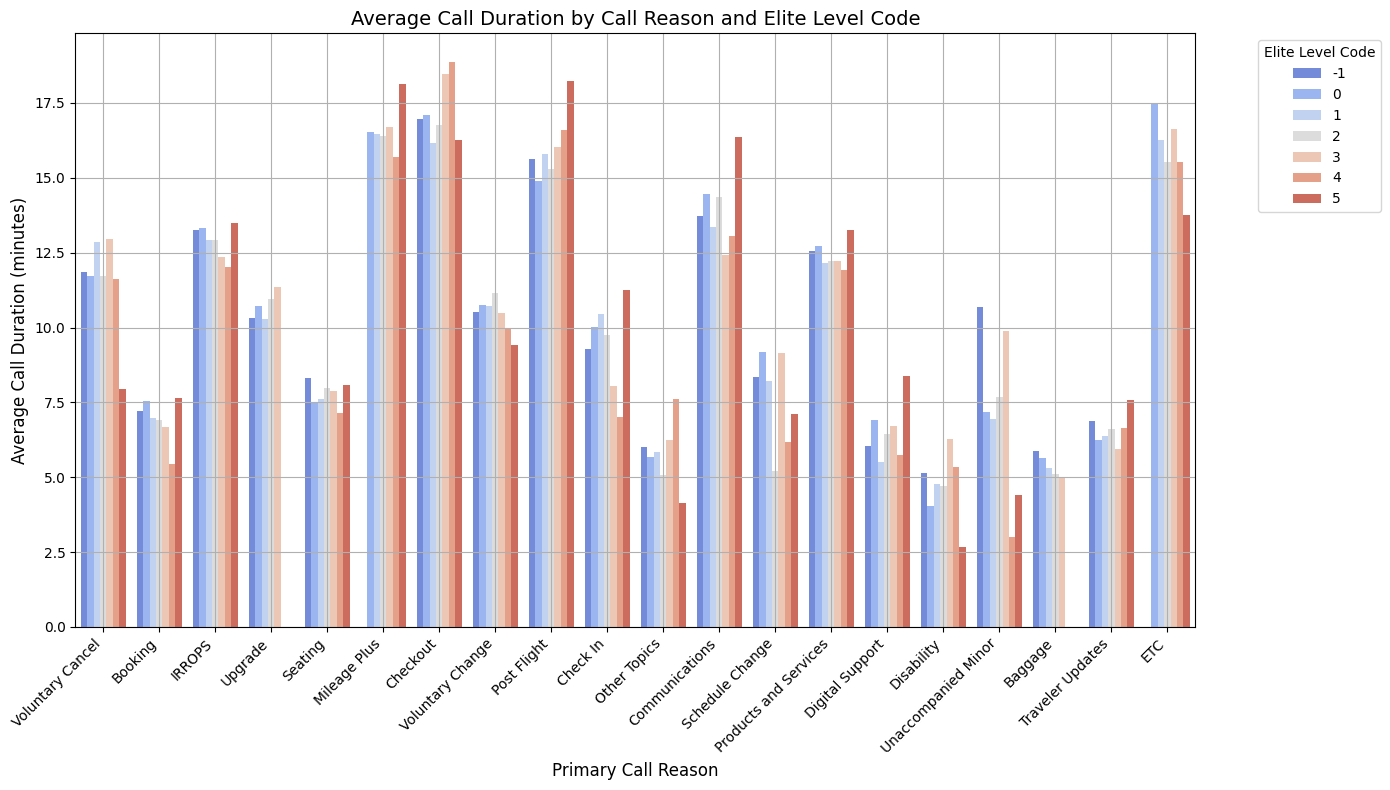

In [121]:
plt.figure(figsize=(14, 8))

# Create a bar plot
sns.barplot(
    x='primary_call_reason',
    y='average_call_duration',
    hue='elite_level_code',
    data=avg_call_duration_table,
    palette='coolwarm'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Primary Call Reason', fontsize=12)
plt.ylabel('Average Call Duration (minutes)', fontsize=12)
plt.title('Average Call Duration by Call Reason and Elite Level Code', fontsize=14)

# Show the legend outside the plot
plt.legend(title='Elite Level Code', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show grid for easier readability
plt.grid(True)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

- Call Duration Variation:
    - Call durations vary significantly across different reasons and elite levels.
    - Some call reasons consistently have longer durations (e.g., "Products and Services", "Post Flight") while others are shorter (e.g., "Baggage", "Disability").
- Elite Level Impact:
    - Generally, higher elite levels (4 and 5) tend to have longer call durations for most reasons.
    - This suggests that elite customers may receive more detailed or personalized service.
- Longest Call Types:
    - "Products and Services" and "Post Flight" issues typically have the longest call durations across all elite levels.
    - This indicates these are complex issues requiring more time to resolve.
- Shortest Call Types:
    - "Baggage" and "Digital Support" tend to have shorter durations, possibly due to more straightforward resolution processes.
- Elite Level Consistency:
    - Some call reasons (e.g., "ETC", "IRROPS") show relatively consistent durations across elite levels.
    - This might indicate standardized processes regardless of customer status for these issues.
- Outliers:
    - There are some notable outliers, like very long durations for elite level 5 in "Digital Support" and "Communications".
    - These could represent complex cases or may warrant investigation for process improvement.
- Non-Elite vs Elite:
    - Non-elite customers (-1 and 0 levels) often have shorter call durations compared to elite levels.
    - This could indicate different service standards or less complex issues for non-elite customers.
- Mid-Range Elite Levels:
    - Elite levels 1-3 often show similar patterns, with call durations falling between non-elite and top-tier elite customers.
- Voluntary Changes:
    - "Voluntary Cancel" and "Voluntary Change" show interesting patterns with varying durations across elite levels, suggesting different handling procedures or complexities based on customer status.
- Potential Areas for Improvement:
    - Categories with consistently long call durations across all levels (e.g., "Communications", "Mileage Plus") might benefit from process optimization or additional staff training.

# average silence percentage by call reason

In [100]:
average_silence_by_reason = d1.groupby('primary_call_reason')['silence_percent_average'].mean().reset_index()

# Rename the columns for clarity
average_silence_by_reason.columns = ['call_reason', 'average_silence_percentage']

# Display the result
print(average_silence_by_reason)

              call_reason  average_silence_percentage
0        Voluntary Cancel                    0.281767
1                 Booking                    0.260948
2                  IRROPS                    0.309404
3                 Upgrade                    0.277023
4                 Seating                    0.264613
5            Mileage Plus                    0.275038
6                Checkout                    0.292309
7        Voluntary Change                    0.289599
8             Post Flight                    0.297804
9                Check In                    0.262736
10           Other Topics                    0.272726
11         Communications                    0.303578
12        Schedule Change                    0.267223
13  Products and Services                    0.276759
14        Digital Support                    0.285298
15             Disability                    0.248635
16    Unaccompanied Minor                    0.242500
17                Baggage   

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\953317131.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_silence_by_reason = d1.groupby('primary_call_reason')['silence_percent_average'].mean().reset_index()


In [101]:
average_silence_by_reason.describe()

,average_silence_percentage
count,20.000000
mean,0.276537
std,0.018165
min,0.242500
25%,0.264144
50%,0.276891
75%,0.288072
max,0.309404


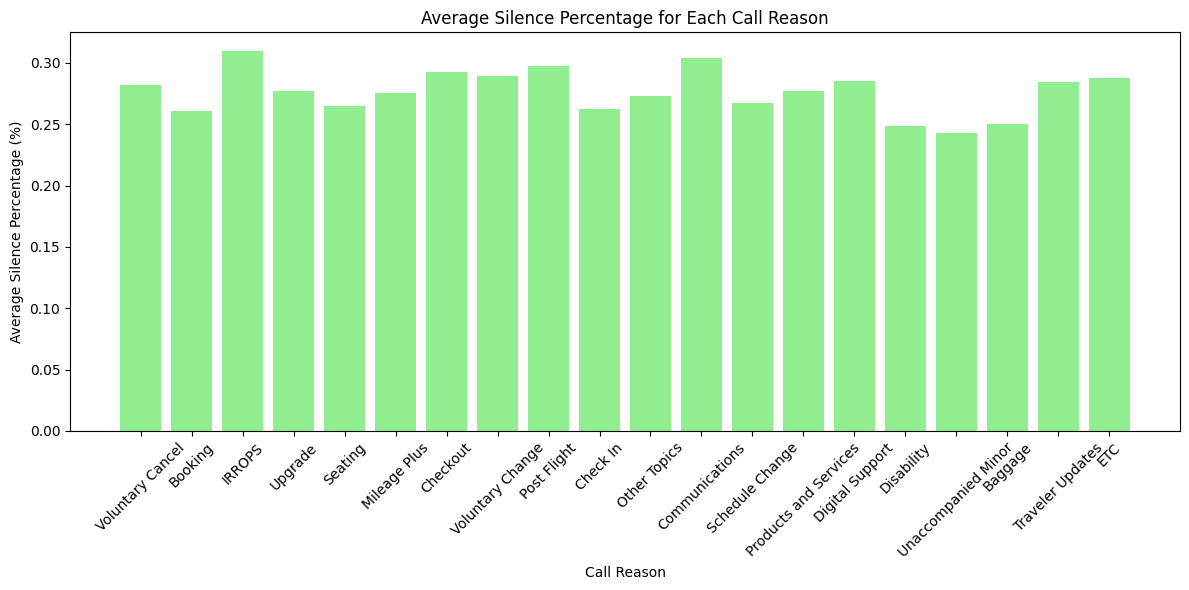

In [102]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for average silence percentage by call reason
plt.bar(average_silence_by_reason['call_reason'], average_silence_by_reason['average_silence_percentage'], color='lightgreen')

# Set title and labels
plt.title("Average Silence Percentage for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Average Silence Percentage (%)")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

1. Overall Silence Pattern:
   - Silence percentages range from approximately 24% to 31%
   - Most categories hover around 25-30% silence time
   - This suggests a fairly consistent pattern across different call types
2. Highest Silence Percentages:
   - IRROPS (Irregular Operations) shows the highest silence at about 31%
   - Communications and Checkout also have higher silence percentages
   - This might indicate more complex issues requiring system lookups or problem-solving

3. Lowest Silence Percentages:
   - Disability-related calls have the lowest silence percentage
   - Unaccompanied Minor calls also show lower silence
   - This suggests more active conversation in these sensitive categories

4. Operational Implications:
   - Higher silence percentages might indicate:
     * Agents checking systems or documentation
     * More complex problem-solving needs
     * Potential system inefficiencies

5. Customer Experience Insights:
   - Consistent silence across categories suggests standardized processes
   - Customers might need to be prepared for some wait time during calls
   - Could benefit from explanations of what's happening during silent periods

6. Training Opportunities:
   - Focus on reducing silence in high-percentage categories
   - Develop strategies to engage customers during necessary system checks
   - Share best practices from categories with lower silence percentages

7. Efficiency Considerations:
   - Average silence of 25-30% might be optimized
   - Could investigate if reducing silence improves customer satisfaction
   - Balance needed between thorough service and efficient handling

8. Technology Implications:
   - Silence might indicate system navigation time
   - Opportunity for improved interfaces or automation
   - Could explore ways to reduce lookup times in common scenarios

9. Correlation with Call Complexity:
   - Categories with more silence might be more complex
   - Simple issues like baggage have slightly lower silence percentages
   - Could use this data to anticipate call handling times

10. Best Practices Identification:
    - Study what makes some categories have less silence
    - Potentially standardize processes to reduce unnecessary silence
    - Consider customer communication during silent periods

# agent_tone vs call_duration

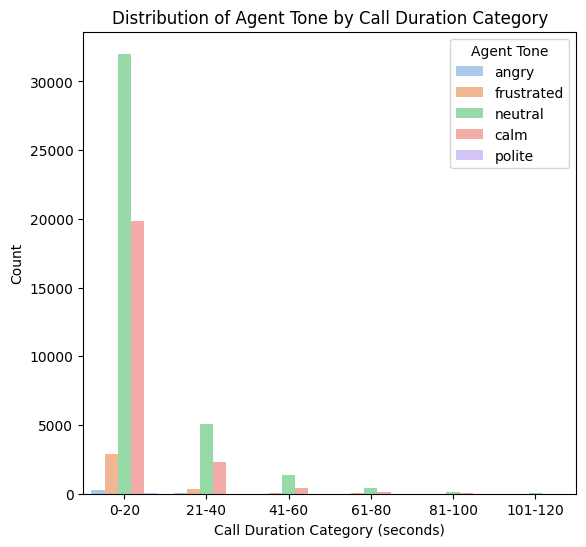

In [123]:
bins = [0, 20, 40, 60, 80, 100, 120]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100', '101-120']

# Assign categories to call duration
d1['duration_category'] = pd.cut(d1['call_duration'], bins=bins, labels=labels, right=True)

# Set up the figure for subplots
plt.figure(figsize=(14, 6))

# Plotting the distribution of Agent Tone by Call Duration Category
plt.subplot(1, 2, 1)
sns.countplot(data=d1, x='duration_category', hue='agent_tone', palette='pastel')
plt.title('Distribution of Agent Tone by Call Duration Category')
plt.xlabel('Call Duration Category (seconds)')
plt.ylabel('Count')
plt.legend(title='Agent Tone')

- Short Call Dominance:
    - The vast majority of calls fall into the 0-20 seconds category, suggesting many interactions are brief.
- Tone Distribution in Short Calls:
    - For 0-20 second calls, "neutral" tone is most common, followed by "calm" and then "frustrated".
    - This indicates that brief interactions are generally handled professionally, but there's a notable presence of frustration.
- Decreasing Call Frequency with Duration:
    - The number of calls decreases significantly as the duration increases, with very few calls lasting beyond 60 seconds.
- Neutral Tone Prevalence:
    - "Neutral" tone is the most common across all duration categories, suggesting agents maintain a professional demeanor regardless of call length.
- Calm Tone:
    - "Calm" is the second most frequent tone, particularly in shorter calls, indicating good emotional control by agents.
- Frustrated Tone:
    - There's a noticeable presence of "frustrated" tone in short calls, which might warrant further investigation.
- Angry and Polite Tones:
    - "Angry" and "polite" tones are relatively rare, with minimal representation across all duration categories.
- Longer Calls:
    - For calls lasting over 40 seconds, the diversity of tones decreases, with mainly neutral tones observed.
- Absence of Extreme Emotions in Longer Calls:
    - Longer calls (over 60 seconds) show almost exclusively neutral tones, suggesting that extended interactions are handled professionally.
- Training Opportunities:
    - The presence of frustrated tones in short calls might indicate a need for training in quick, positive resolutions.
- Efficiency vs. Emotional Management:
    - The high number of short, neutral calls suggests efficient handling, but there might be a trade-off with personalized, emotionally engaging service.

# customer_tone vs call_duration

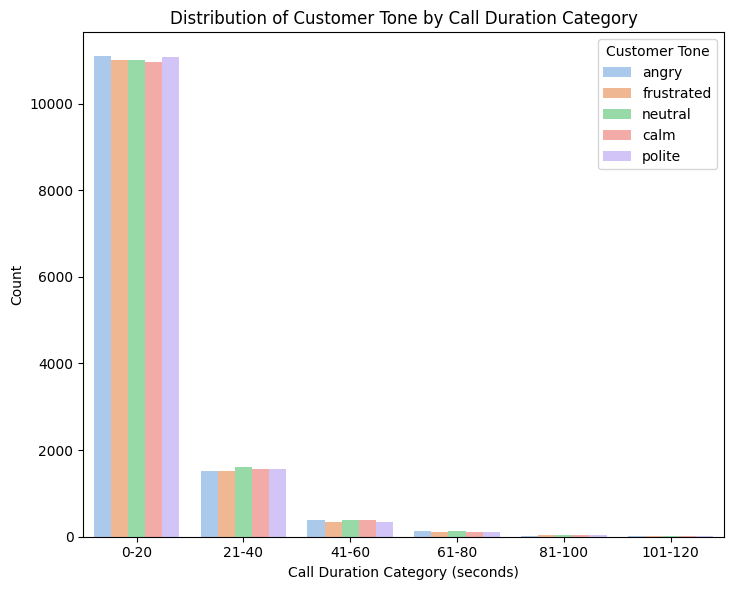

In [124]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.countplot(data=d1, x='duration_category', hue='customer_tone', palette='pastel')
plt.title('Distribution of Customer Tone by Call Duration Category')
plt.xlabel('Call Duration Category (seconds)')
plt.ylabel('Count')
plt.legend(title='Customer Tone')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()

- Short Call Dominance:
    - The vast majority of calls fall into the 0-20 seconds category, indicating that most customer interactions are brief.
- Even Tone Distribution in Short Calls:
    - For 0-20 second calls, all customer tones (angry, neutral, polite, frustrated, calm) are almost equally represented.
    - This suggests a wide range of customer emotions even in brief interactions.
- Decreasing Call Frequency with Duration:
    - The number of calls decreases significantly as the duration increases, with very few calls lasting beyond 60 seconds.
- Consistent Tone Distribution:
    - Across all duration categories, the distribution of customer tones remains relatively consistent.
    - This suggests that call duration doesn't strongly correlate with specific customer emotions.
- Presence of Negative Emotions:
    - "Angry" and "frustrated" tones are present in similar proportions to positive tones, indicating a significant number of dissatisfied customers.
- Positive Customer Interactions:
    - "Polite" and "calm" tones are well-represented, showing that many customers maintain positive attitudes during calls.
- Neutral Tone:
    - "Neutral" tone is consistently present across all duration categories, suggesting that many customers remain emotionally neutral during their interactions.
- Longer Calls:
    - For calls lasting over 40 seconds, the overall number decreases, but the proportion of tones remains similar to shorter calls.
- Minimal Extended Interactions:
    - Very few calls last beyond 80 seconds, suggesting that most issues are resolved relatively quickly.
- Customer Emotion Complexity:
    - The even distribution of tones indicates that customer emotions are complex and varied, regardless of call duration.
- Service Quality Implications:
    - The consistent presence of negative tones (angry, frustrated) across all durations suggests ongoing challenges in customer satisfaction that aren't necessarily resolved by longer interactions.

# average_sentiment

{'whiskers': [<matplotlib.lines.Line2D at 0x1af48172ba0>,
 'caps': [<matplotlib.lines.Line2D at 0x1af48173110>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af48172930>],
 'medians': [<matplotlib.lines.Line2D at 0x1af48173710>],
 'fliers': [],
 'means': []}

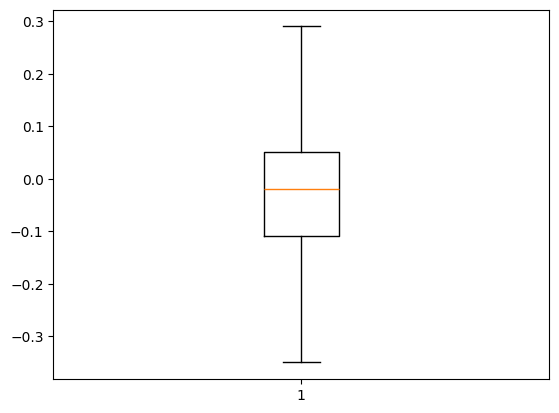

In [125]:
plt.boxplot(d1.average_sentiment,showfliers=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1af4ebb1310>,
 'caps': [<matplotlib.lines.Line2D at 0x1af4ebb0d70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1af4ebb15e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1af4ebb0800>],
 'fliers': [<matplotlib.lines.Line2D at 0x1af4ebb0590>],
 'means': []}

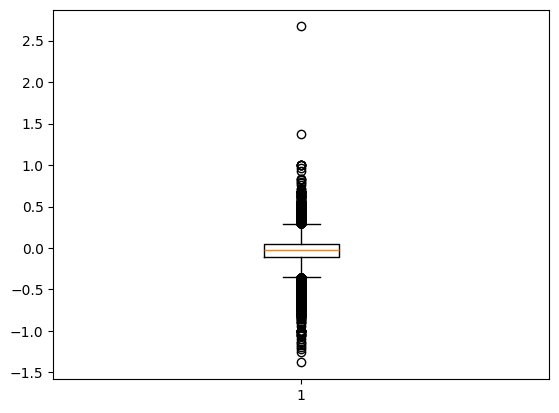

In [126]:
plt.boxplot(d1.average_sentiment)

- range is btw -0.3 to +0.3
- extreme +ve is 2.5
  - it was for Voluntary change(primary_call_reason)
- extreme -ve is -1.6

# agents with max avg call duration by reason

In [130]:
average_duration = d1.groupby(['agent_id', 'primary_call_reason'], as_index=False)['call_duration'].mean()
average_duration.rename(columns={'call_duration': 'average_call_duration'}, inplace=True)

# Pivot the DataFrame
pivot_table = average_duration.pivot(index='agent_id', columns='primary_call_reason', values='average_call_duration')

# Fill NaN values with 0 or another placeholder (optional)
pivot_table.fillna(0, inplace=True)

# Reset index to make agent_id a column again
pivot_table.reset_index(inplace=True)

melted = pivot_table.melt(id_vars=['agent_id'], var_name='call_reason', value_name='average_call_duration')

# Filter out rows where average_call_duration is less than or equal to zero
melted = melted[melted['average_call_duration'] > 0]

# Find the agent with the maximum average call duration for each reason
max_agents = melted.loc[melted.groupby('call_reason')['average_call_duration'].idxmax()].sort_values('average_call_duration')

# Reset index for clarity (optional)
max_agents.reset_index(drop=True, inplace=True)

# Display the result
print(max_agents)


    agent_id            call_reason  average_call_duration
0     294450                Seating                   23.0
1     552900           Other Topics                   26.0
2     234327                Baggage                   29.0
3     760378             Disability                   29.5
4     937733        Digital Support                   34.0
5     545730                 IRROPS                   35.0
6     757377       Traveler Updates                   38.0
7     750345         Communications                   44.0
8     616850       Voluntary Change                   44.0
9     537146        Schedule Change                   46.0
10    638327                Upgrade                   46.0
11    437196    Unaccompanied Minor                   49.0
12    798578       Voluntary Cancel                   52.0
13    140146           Mileage Plus                   63.0
14    917294               Checkout                   71.0
15    289288  Products and Services                   75

C:\Users\deepa\AppData\Local\Temp\ipykernel_2932\2440662429.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_duration = d1.groupby(['agent_id', 'primary_call_reason'], as_index=False)['call_duration'].mean()


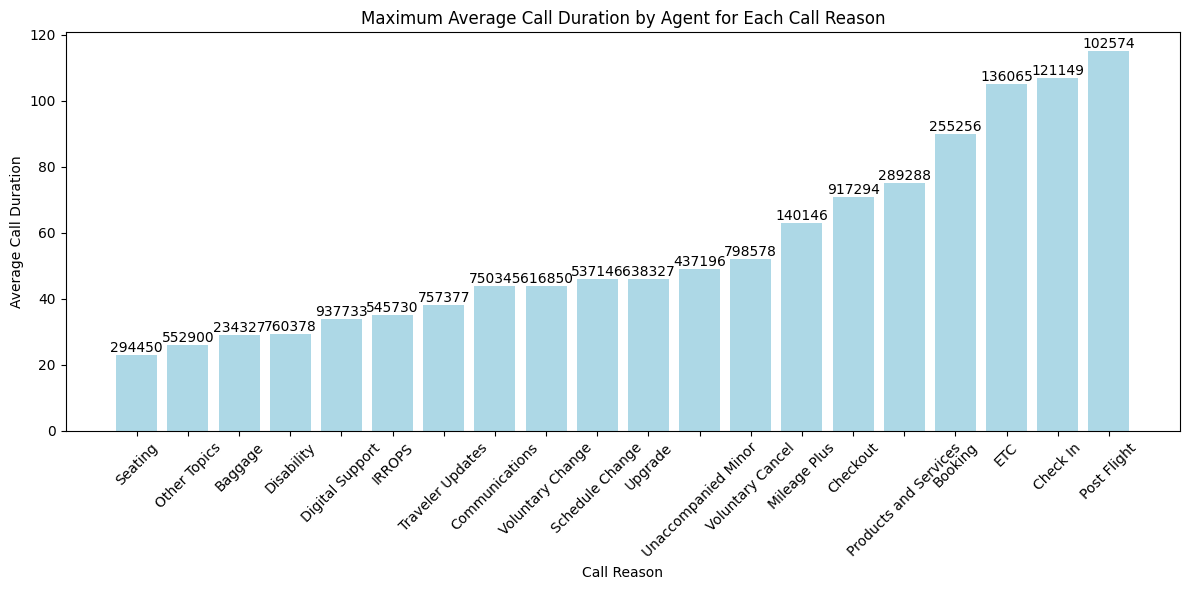

In [134]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for maximum average call duration
plt.bar(max_agents['call_reason'], max_agents['average_call_duration'], color='lightblue')

# Adding agent names as annotations above each bar
for i, row in max_agents.iterrows():
    plt.text(i, row['average_call_duration'], row['agent_id'], ha='center', va='bottom')

# Set title and labels
plt.title("Maximum Average Call Duration by Agent for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Average Call Duration")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

- agent with these agent_ids are taking the maximum time for that reason : 
    - the working process of that agent need to be monitored to address the inefficiencies caused by that agent

# agents with minimum avg call duration by reason

In [133]:
melted = pivot_table.melt(id_vars=['agent_id'], var_name='call_reason', value_name='average_call_duration')

# Filter out rows where average_call_duration is less than or equal to zero
melted = melted[melted['average_call_duration'] > 0]

# Find the agent with the minimum average call duration for each reason
min_agents = melted.loc[melted.groupby('call_reason')['average_call_duration'].idxmin()].sort_values('average_call_duration')

# Reset index for clarity (optional)
min_agents.reset_index(drop=True, inplace=True)

# Display the result
print(min_agents)

    agent_id            call_reason  average_call_duration
0     214289                Baggage               0.500000
1     640212       Traveler Updates               0.666667
2     311571       Voluntary Cancel               0.666667
3     292344               Check In               1.000000
4     139291        Digital Support               1.000000
5     265196             Disability               1.000000
6     233571                    ETC               1.000000
7     461615                Booking               1.000000
8     136010        Schedule Change               1.000000
9     992521           Mileage Plus               1.000000
10    603165            Post Flight               1.000000
11    153182           Other Topics               1.000000
12    234327                Seating               1.000000
13    616850  Products and Services               1.000000
14    208992    Unaccompanied Minor               1.000000
15    294450               Checkout               1.0000

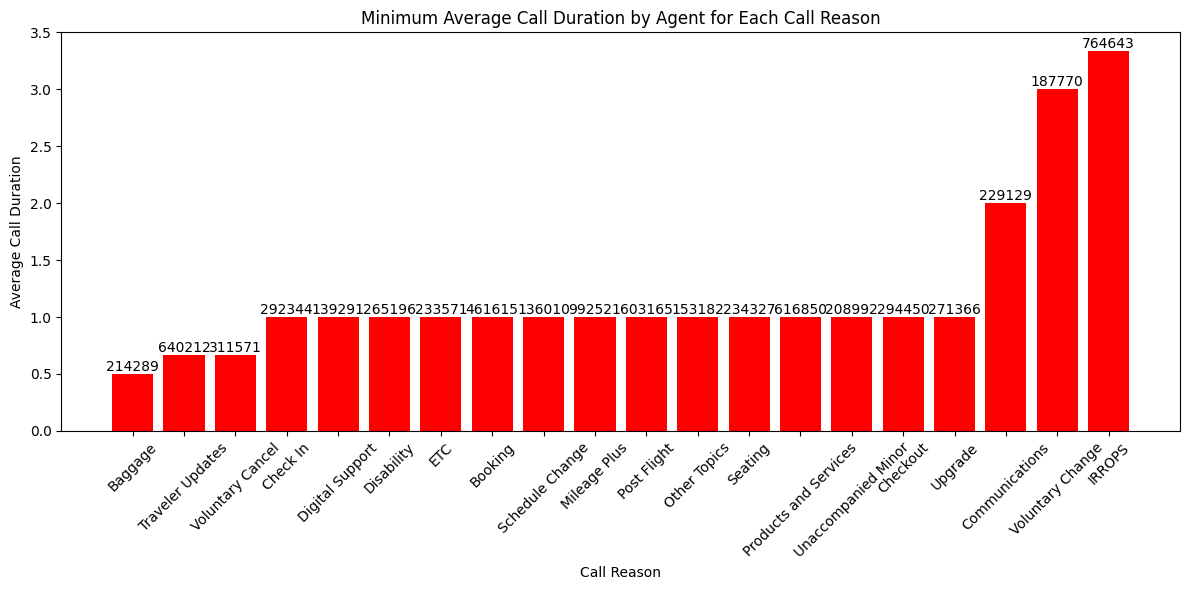

In [156]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for maximum average call duration
plt.bar(min_agents['call_reason'], min_agents['average_call_duration'], color='red')

# Adding agent names as annotations above each bar
for i, row in min_agents.iterrows():
    plt.text(i, row['average_call_duration'], row['agent_id'], ha='center', va='bottom')

# Set title and labels
plt.title("Minimum Average Call Duration by Agent for Each Call Reason")
plt.xlabel("Call Reason")
plt.ylabel("Average Call Duration")
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

- agent with these agent_ids are taking the minimum time for that reason : 
    - the working process of that agent need to be monitored to take inspirations from the efficient work by that agent